<a href="https://colab.research.google.com/github/joekakone/Prepare-Google-Tensorflow-Certificate/blob/master/1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Build and train neural network models using TensorFlow 2.x
- 1.1: Linear regression (Football players values) [[Notebook]](1_1.ipynb)
- **1.2: Iris flowers classification** [[Notebook]](1_2.ipynb)

## Packages

In [1]:
import math

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.2'

## Config

In [3]:
n_samples = 1000
n_features = 8
test_size = .3
learning_rate = 0.01
n_epochs = 30
batch_size = 48

## Get data

In [4]:
 X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=42)

## Design model

In [6]:
# model = keras.Sequential([keras.layers.Dense(units=1, input_shape=(n_features,))])
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, activation='sigmoid', input_shape=(n_features,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


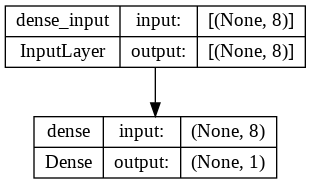

In [7]:
keras.utils.plot_model(model=model, show_shapes=True)

## Train model

In [8]:
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['root_mean_squared_error'])
# keras.backend.set_value(model.optimizer.lr, learning_rate)
model.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate), 
    metrics=['acc']
)

In [9]:
steps_per_epoch = math.ceil(len(X_train) / 48)

history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=n_epochs, steps_per_epoch=steps_per_epoch)

Epoch 1/30
15/15 [==============================] - 1s 16ms/step - loss: 1.1028 - acc: 0.5643 - val_loss: 1.2861 - val_acc: 0.4933
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 1.0432 - acc: 0.5786 - val_loss: 1.2139 - val_acc: 0.4967
Epoch 3/30
15/15 [==============================] - 0s 8ms/step - loss: 0.9869 - acc: 0.5914 - val_loss: 1.1453 - val_acc: 0.5167
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 0.9337 - acc: 0.6014 - val_loss: 1.0802 - val_acc: 0.5433
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 0.8835 - acc: 0.6114 - val_loss: 1.0187 - val_acc: 0.5533
Epoch 6/30
15/15 [==============================] - 0s 4ms/step - loss: 0.8364 - acc: 0.6229 - val_loss: 0.9607 - val_acc: 0.5700
Epoch 7/30
15/15 [==============================] - 0s 5ms/step - loss: 0.7924 - acc: 0.6314 - val_loss: 0.9063 - val_acc: 0.5867
Epoch 8/30
15/15 [==============================] - 0s 5ms/step - loss: 0.7512 - acc: 0.6

## Training Reporting

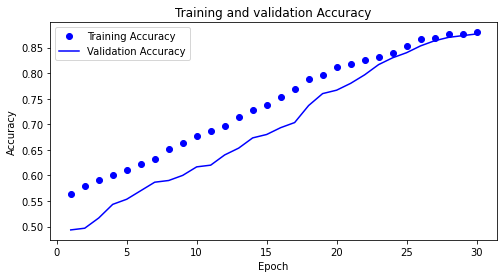

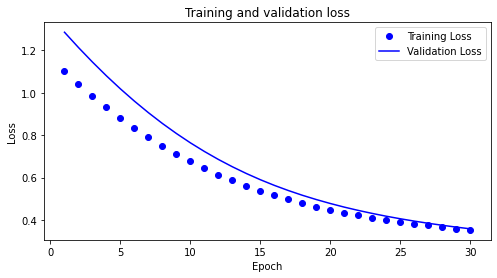

In [10]:
accuracy = history.history['acc']
loss = history.history['loss']
val_accuracy = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation Accuracy')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

## Save model

In [11]:
model_path = 'model_1_2.h5'
model.save(filepath=model_path)